# 9. Merged dataset - evaluate parameter sets performance (100 CVs)

- HVPG16, HVPG10
- for each parameter/setting set:
    - create a subset of all patients with all necessary records available
    - run 100 5-fold cross-validations for each of the 5 models:
        - logistic regression, MLP, random forest, SVM, XGBoost
    - report AUC from each fold
    - calculate mean/median AUCs across all CVs
    - plot mean AUCs (each point = 1 CV, represented by its mean AUC value, final reported value = mean)
    
<sub>original notebook name: `VICIS_34_revision_v4_merged_cohorts_rerun.ipynb`</sub>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# prediction models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# plotting configuration - set size, use high resolution
from IPython.display import set_matplotlib_formats
from matplotlib import rc_params
plt.rcParams['figure.figsize'] = [11, 5]
set_matplotlib_formats('retina')
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 11

/var/folders/rb/y91w78gd2_sdrdl2sglwd_q91gs47h/T/ipykernel_1942/1299526473.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
import HVPG16_functions

In [3]:
preprocessed_data_path = "/Users/jreinis/OneDrive/Rotation/rotation/data_merged_final_v0/merged_datasets_preprocessed_final_v0.csv"
output_plots_path = "/Users/jreinis/OneDrive/Rotation/rotation/HVPG16_manuscript_figures_v4_revision/models_performance/"
output_AUCs_path = "/Users/jreinis/OneDrive/Rotation/rotation/HVPG16_manuscript_figures_v4_revision/models_performance/AUCs"

In [4]:
data = pd.read_csv(preprocessed_data_path)
# call liver stiffness just LSM
data.rename(columns = {"VCTE-LSM-kPa":"LSM"}, inplace=True)

In [5]:
models = [LogisticRegression(C = 1, max_iter=15000, warm_start=False),
          MLPClassifier(hidden_layer_sizes=(20,20,20,), max_iter=2000, warm_start=False, alpha=.001),
          RandomForestClassifier(n_estimators = 100, warm_start=False),
          SVC(kernel='rbf', C = 0.8, probability=True),
          XGBClassifier(n_estimators = 100, verbosity = 0)]
names = ["Logistic Reg", "MLP", "Random Forest", "SVM", "XGBoost"]

n_cv = 100

### Merged cohorts

#### 5-parameter

In [6]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT"], "5P"

HVPG threshold 16 mmHg, 5 variables (PLT, BILI, aPTT, CHE, GGT), merged cohort(s), 258 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.812481,0.004829,0.814879,0.004829
1,MLP,0.730473,0.006239,0.733564,0.006239
2,Random Forest,0.775747,0.005253,0.778547,0.005253
3,SVM,0.725967,0.005844,0.726644,0.005844
4,XGBoost,0.733598,0.005142,0.735294,0.005142


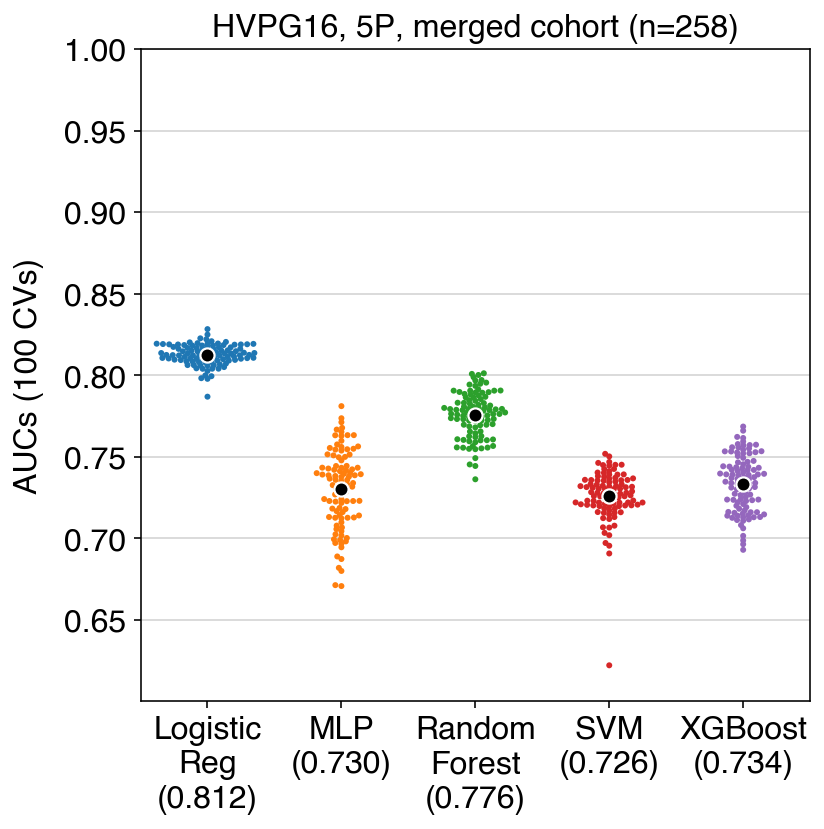

In [7]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter

In [8]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P"

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 1204 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.735106,0.002474,0.734597,0.002474
1,MLP,0.725531,0.002606,0.725942,0.002606
2,Random Forest,0.706840,0.002487,0.707076,0.002487
3,SVM,0.692806,0.002717,0.693162,0.002717
4,XGBoost,0.703258,0.002732,0.702772,0.002732


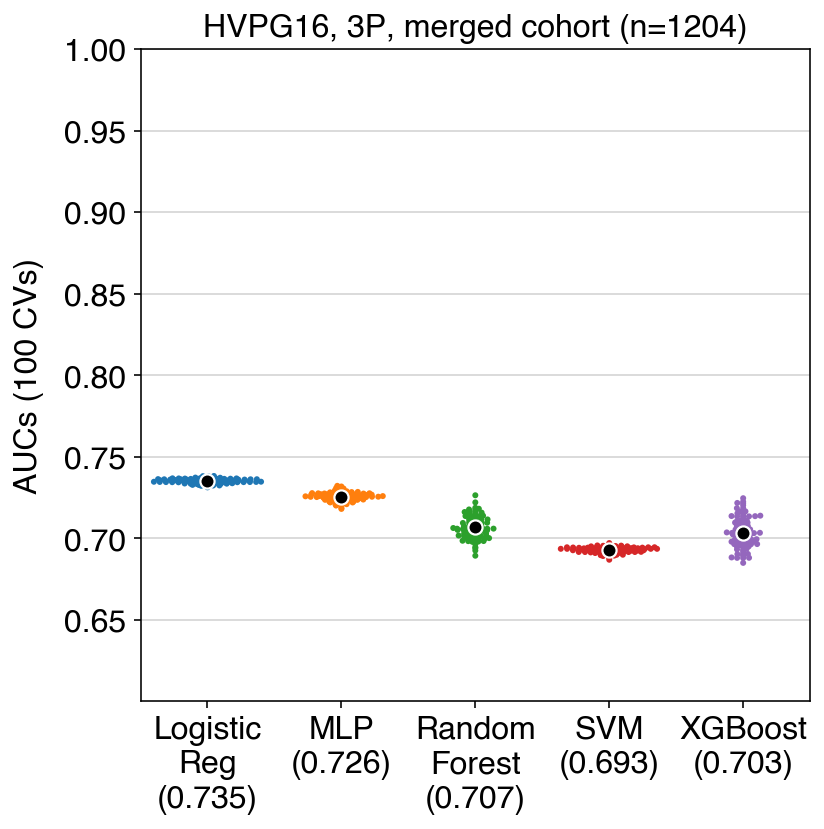

In [9]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 5-parameter including liver stiffness

In [10]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT", "LSM"], "5P + LSM"

HVPG threshold 16 mmHg, 6 variables (PLT, BILI, aPTT, CHE, GGT, LSM), merged cohort(s), 208 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.879892,0.004429,0.886243,0.004429
1,MLP,0.792471,0.008236,0.812169,0.008236
2,Random Forest,0.859880,0.004443,0.864938,0.004443
3,SVM,0.816138,0.005943,0.822090,0.005943
4,XGBoost,0.831874,0.004917,0.835979,0.004917


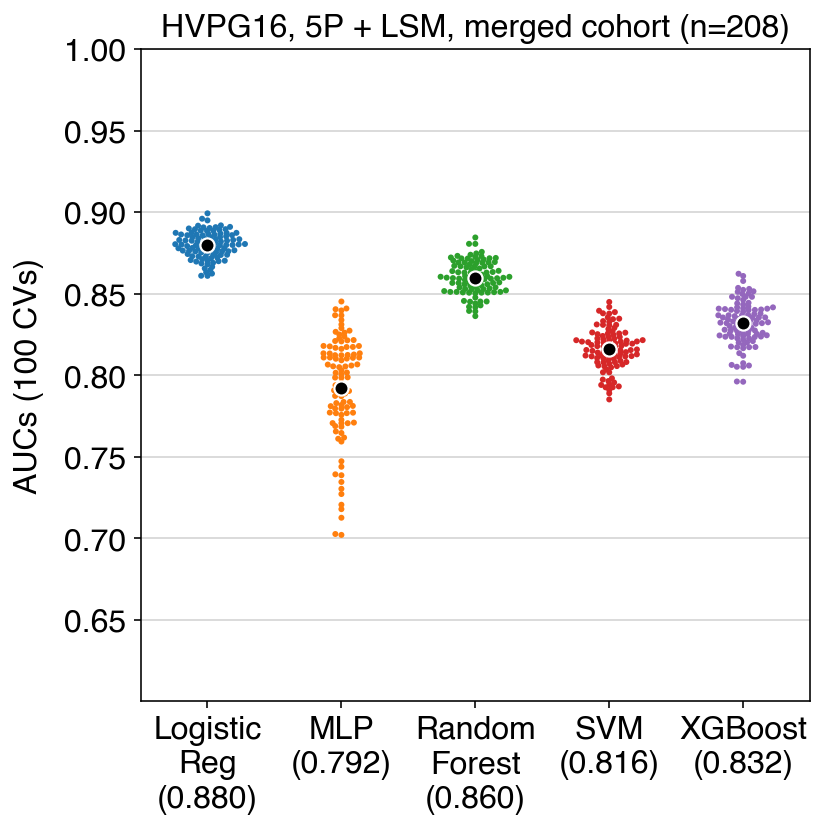

In [11]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter including liver stiffness

In [12]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR", "LSM"], "3P + LSM"

HVPG threshold 16 mmHg, 4 variables (PLT, BILI, INR, LSM), merged cohort(s), 796 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.831226,0.002651,0.831699,0.002651
1,MLP,0.830196,0.002676,0.830578,0.002676
2,Random Forest,0.814280,0.002694,0.813545,0.002694
3,SVM,0.833638,0.002597,0.832789,0.002597
4,XGBoost,0.793285,0.002787,0.792302,0.002787


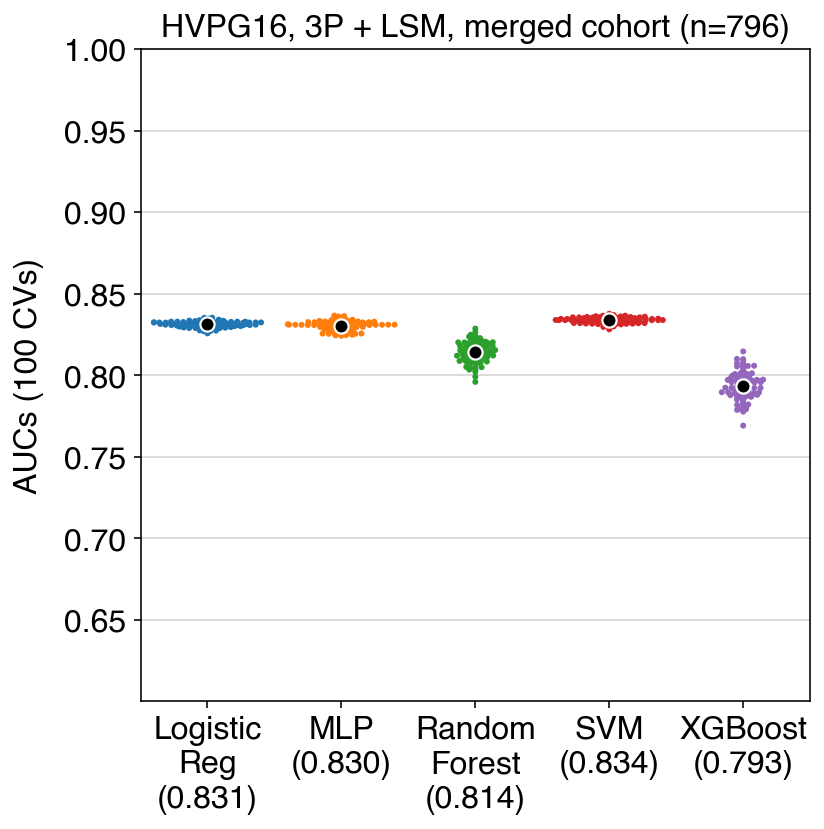

In [13]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### Merged cohorts, with balancing

#### 5-parameter

In [14]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT"], "5P"

HVPG threshold 16 mmHg, 5 variables (PLT, BILI, aPTT, CHE, GGT), merged cohort(s), 174 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.796054,0.006136,0.796617,0.006136
1,MLP,0.691477,0.008065,0.695790,0.008065
2,Random Forest,0.762458,0.006451,0.767974,0.006451
3,SVM,0.732729,0.006865,0.732795,0.006865
4,XGBoost,0.739063,0.006471,0.742887,0.006471


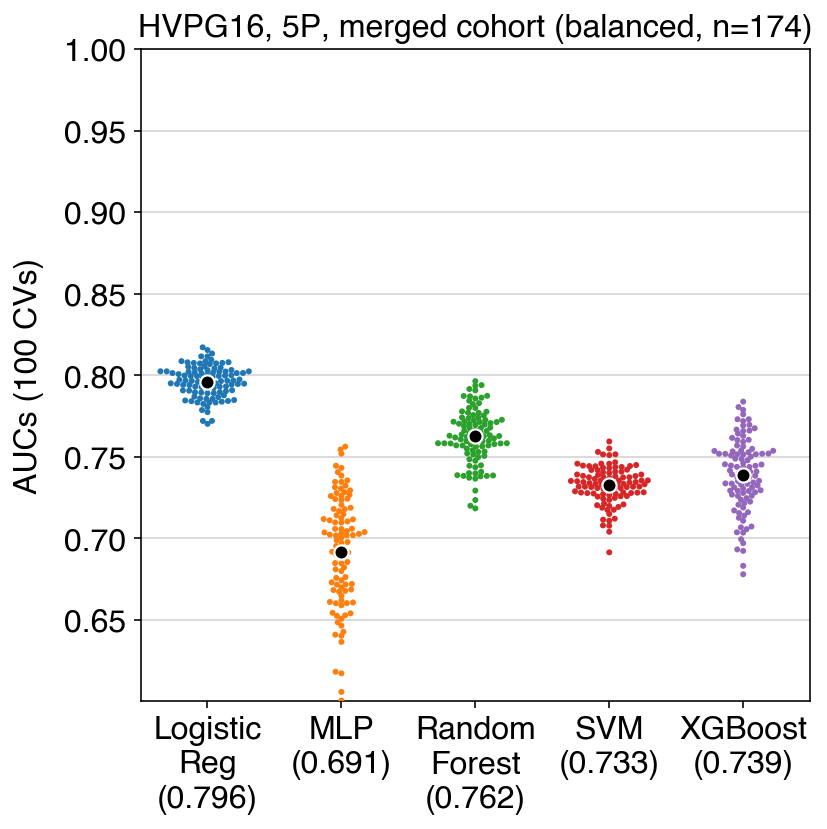

In [15]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter

In [16]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P"

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 832 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.734143,0.003008,0.735593,0.003008
1,MLP,0.724446,0.003043,0.724851,0.003043
2,Random Forest,0.707768,0.002984,0.707759,0.002984
3,SVM,0.708754,0.003128,0.711596,0.003128
4,XGBoost,0.694238,0.002890,0.693962,0.002890


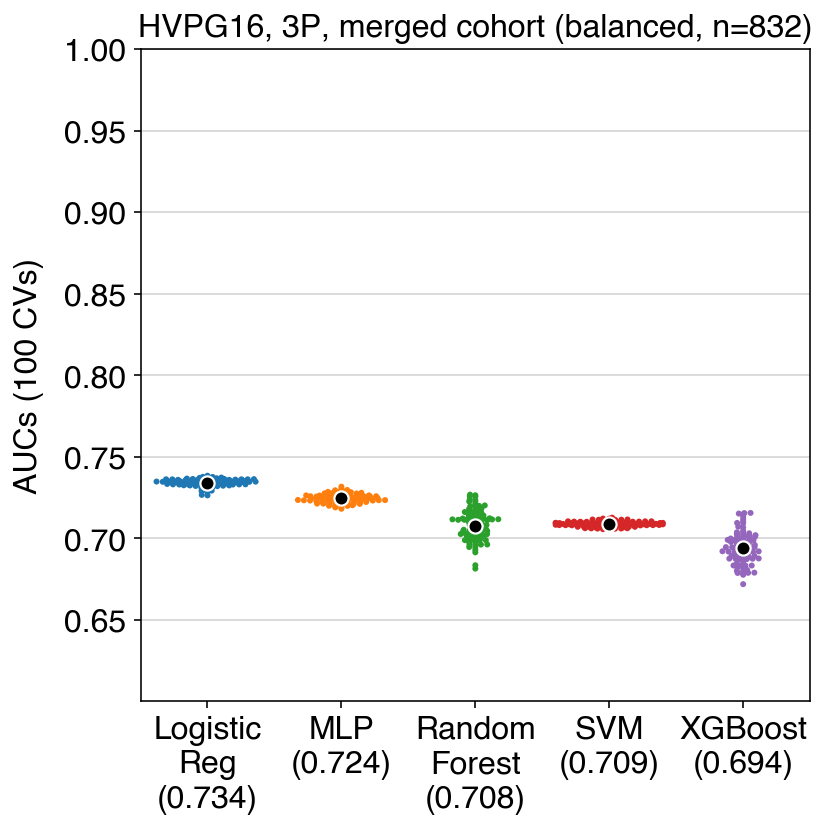

In [17]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 832 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.731149,0.003093,0.732932,0.003093
1,MLP,0.723046,0.003112,0.724488,0.003112
2,Random Forest,0.705641,0.002878,0.705545,0.002878
3,SVM,0.708983,0.003254,0.711674,0.003254
4,XGBoost,0.693705,0.002963,0.693497,0.002963


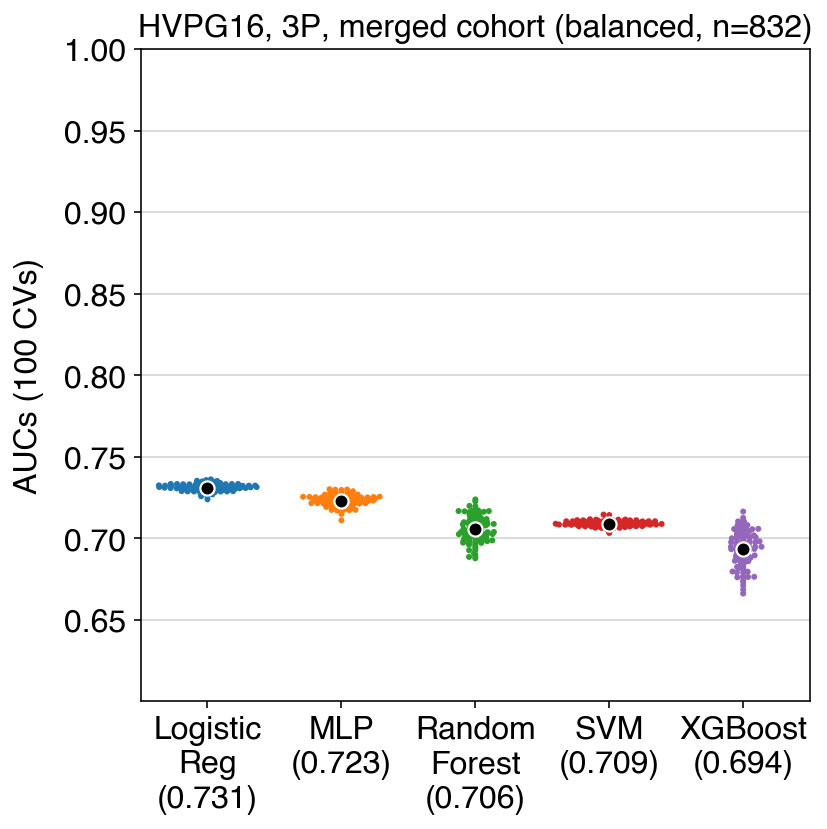

In [18]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 5-parameter including liver stiffness

In [25]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT", "LSM"], "5P + LSM"

HVPG threshold 16 mmHg, 6 variables (PLT, BILI, aPTT, CHE, GGT, LSM), merged cohort(s), 140 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.847204,0.005965,0.852041,0.005965
1,MLP,0.748628,0.008682,0.760204,0.008682
2,Random Forest,0.837811,0.005955,0.843112,0.005955
3,SVM,0.768699,0.007289,0.770408,0.007289
4,XGBoost,0.802633,0.006410,0.811224,0.006410


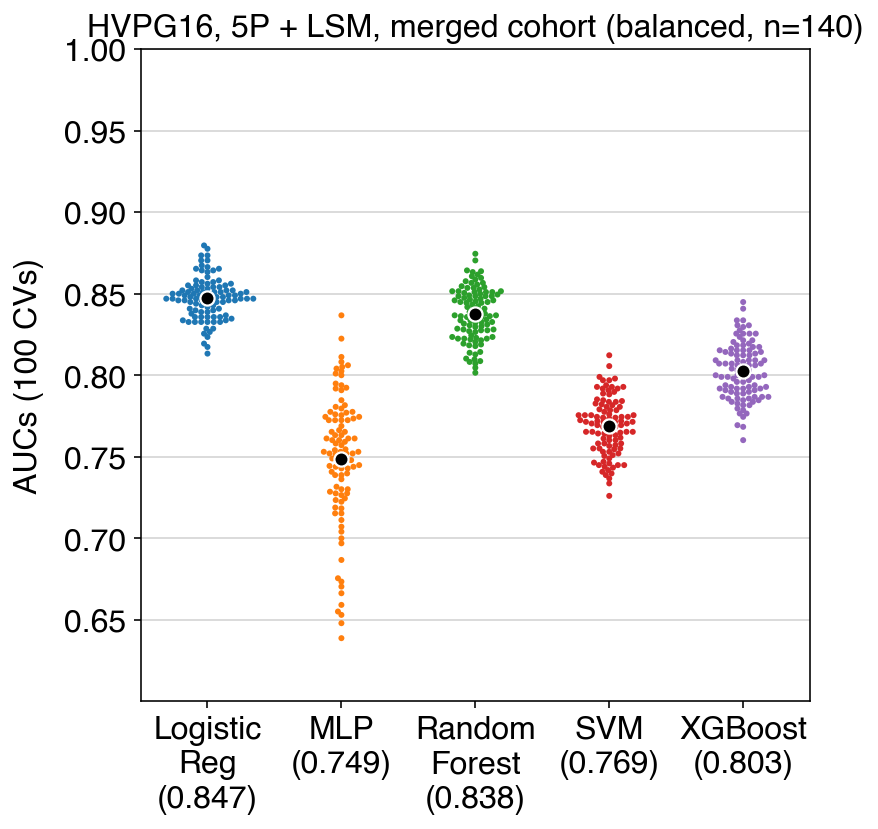

In [26]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter including liver stiffness

In [27]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR", "LSM"], "3P + LSM"

HVPG threshold 16 mmHg, 4 variables (PLT, BILI, INR, LSM), merged cohort(s), 510 patients (after balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.825894,0.003223,0.829296,0.003223
1,MLP,0.821201,0.003205,0.823722,0.003205
2,Random Forest,0.805095,0.003266,0.806997,0.003266
3,SVM,0.821434,0.003144,0.825452,0.003144
4,XGBoost,0.784298,0.003355,0.785659,0.003355


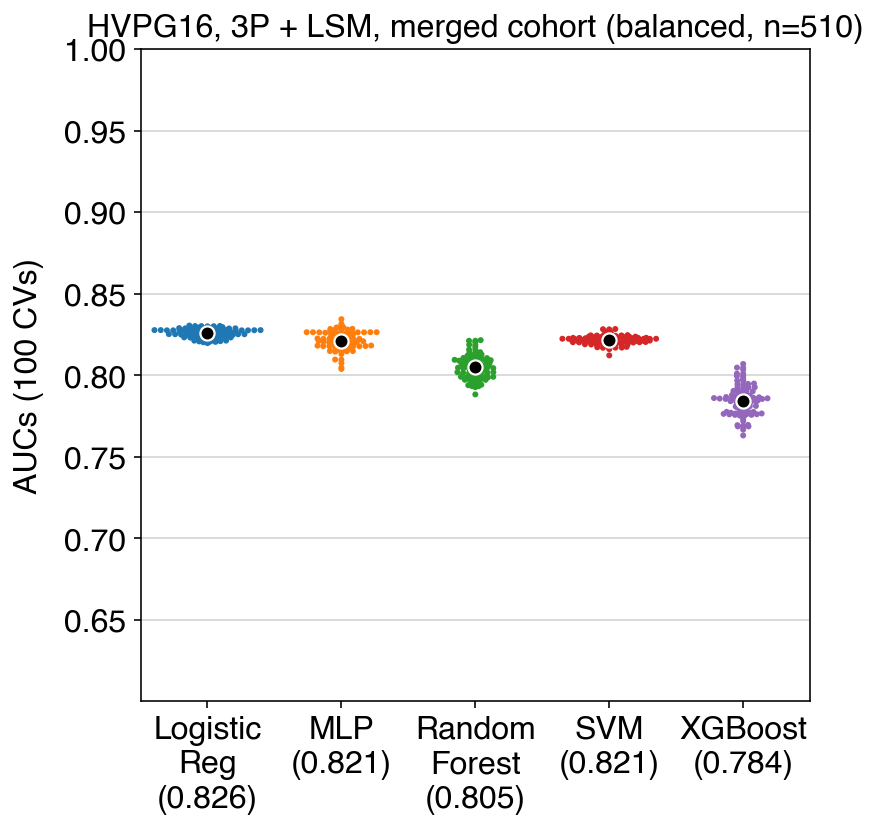

In [28]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True, balance=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### Liver stiffness only

#### No balancing

In [19]:
cohort, variables, title = "merged", ["LSM"], "LSM only"

HVPG threshold 16 mmHg, 1 variables (LSM), merged cohort(s), 804 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.778408,0.003169,0.777992,0.003169


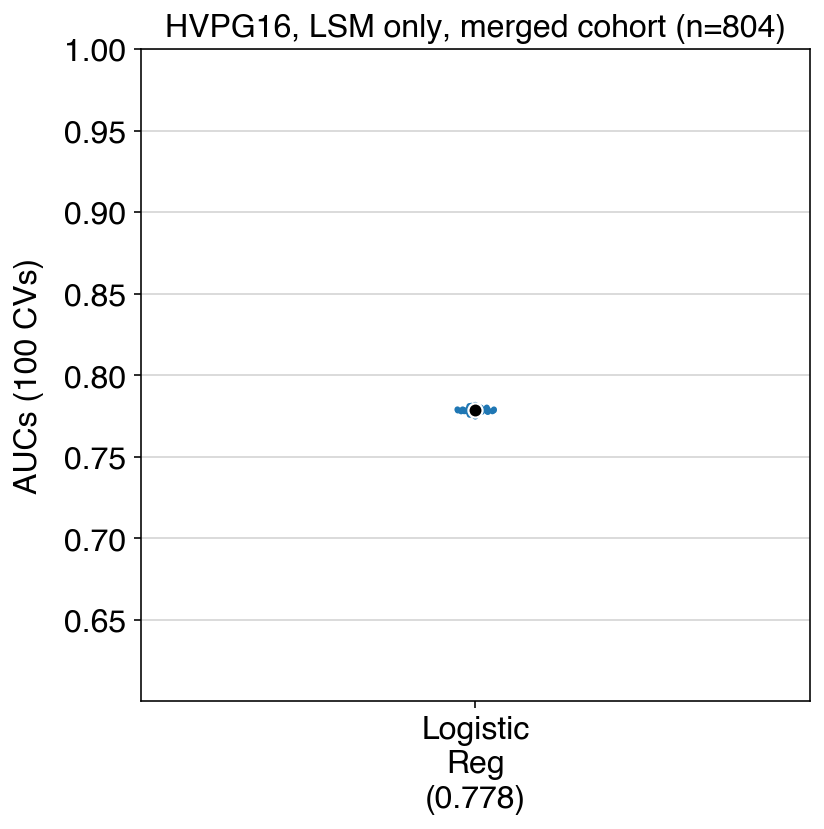

In [20]:
_ = HVPG16_functions.test_models_variables(data, models[:1], names[:1], variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### Merged cohorts, HVPG threshold of 10

#### 5-parameter

HVPG threshold 10 mmHg, 5 variables (PLT, BILI, aPTT, CHE, GGT), merged cohort(s), 258 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.753997,0.006306,0.754329,0.006306
1,MLP,0.681361,0.007752,0.686762,0.007752
2,Random Forest,0.710892,0.006125,0.710648,0.006125
3,SVM,0.723799,0.006776,0.727928,0.006776
4,XGBoost,0.674852,0.005977,0.675926,0.005977


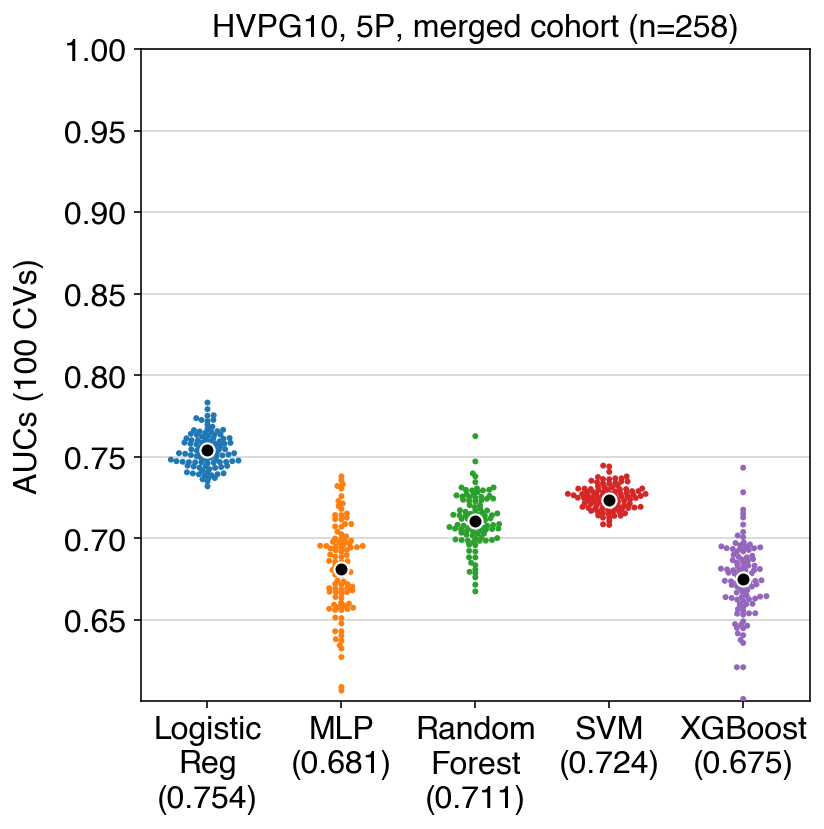

In [21]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT"], "5P"

_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=10, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter

HVPG threshold 10 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 1204 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.772729,0.002615,0.773710,0.002615
1,MLP,0.762285,0.002542,0.763930,0.002542
2,Random Forest,0.735895,0.002565,0.737467,0.002565
3,SVM,0.711555,0.002788,0.713059,0.002788
4,XGBoost,0.716133,0.002630,0.717111,0.002630


/Users/jreinis/miniconda3/envs/test/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


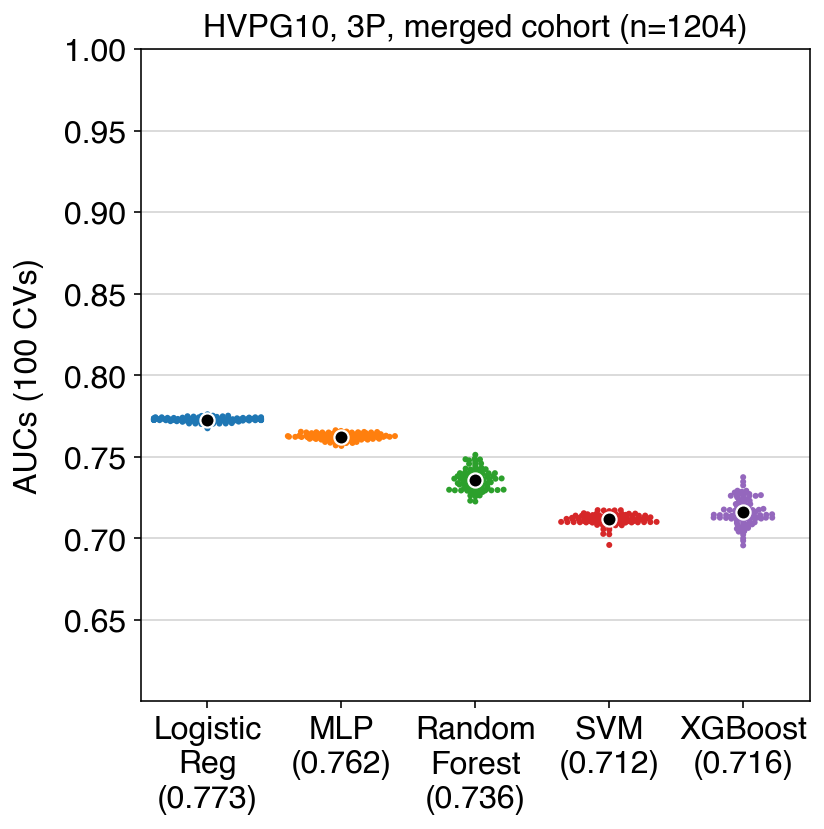

In [22]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P"

_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=10, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 5-parameter including liver stiffness

HVPG threshold 10 mmHg, 6 variables (PLT, BILI, aPTT, CHE, GGT, LSM), merged cohort(s), 208 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.805262,0.005546,0.810440,0.005546
1,MLP,0.729930,0.008405,0.744898,0.008405
2,Random Forest,0.815736,0.005232,0.817602,0.005232
3,SVM,0.778126,0.005910,0.775510,0.005910
4,XGBoost,0.797456,0.005459,0.802198,0.005459


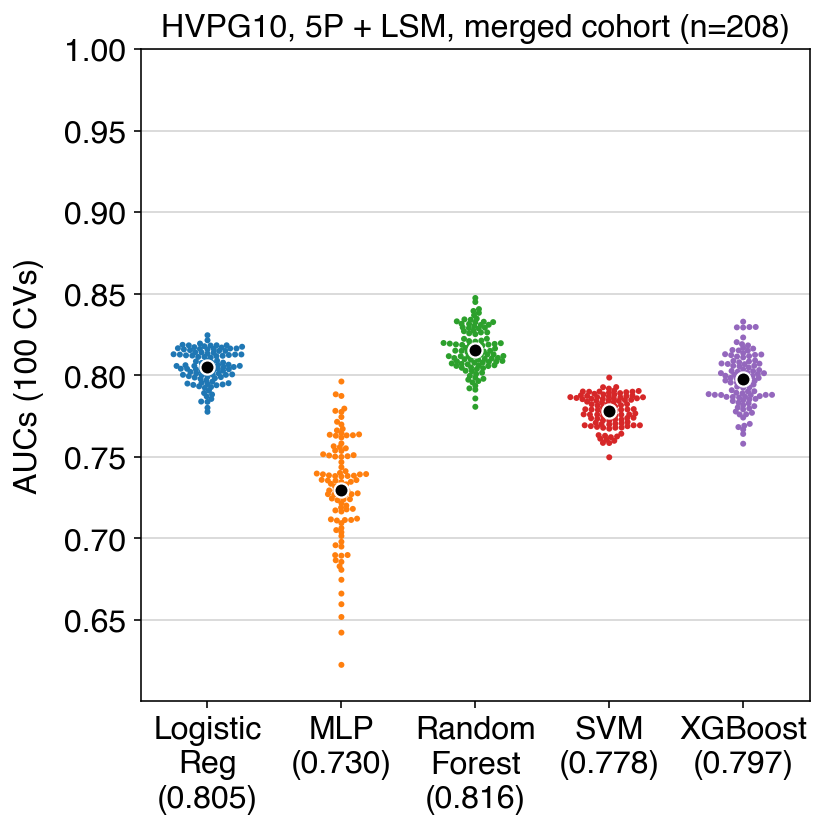

In [23]:
cohort, variables, title = "merged", ["PLT", "BILI", "aPTT", "CHE", "GGT", "LSM"], "5P + LSM"

_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=10, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter including liver stiffness

HVPG threshold 10 mmHg, 4 variables (PLT, BILI, INR, LSM), merged cohort(s), 796 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.855478,0.002571,0.856889,0.002571
1,MLP,0.848812,0.002616,0.849680,0.002616
2,Random Forest,0.850308,0.002373,0.850297,0.002373
3,SVM,0.838928,0.002556,0.841314,0.002556
4,XGBoost,0.832347,0.002454,0.832948,0.002454


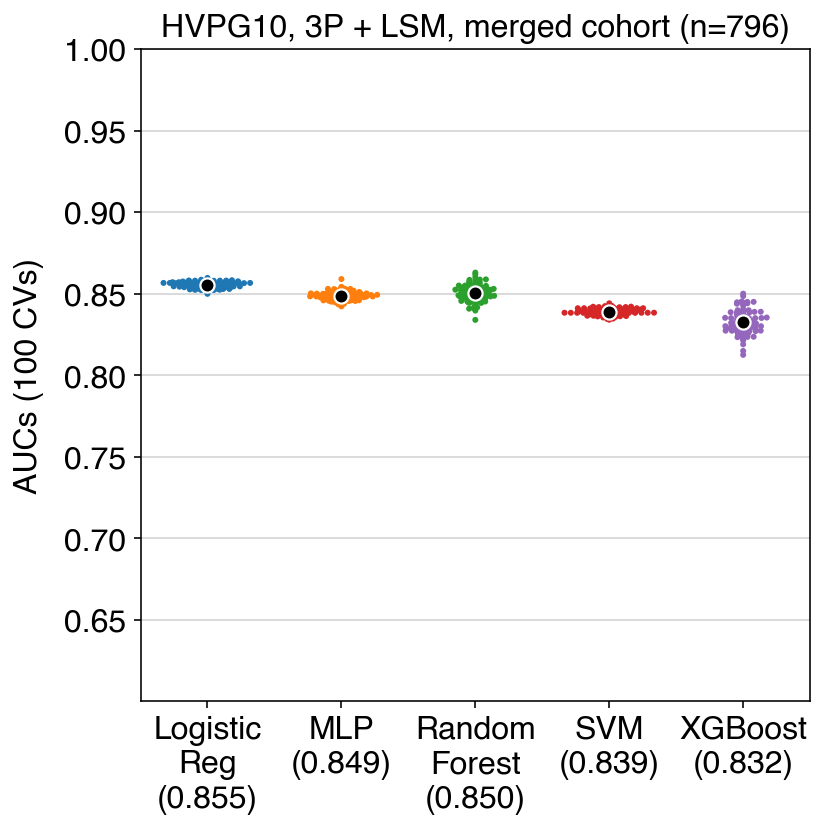

In [24]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR", "LSM"], "3P + LSM"

_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=10, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### ALD patients only: abstinent vs drinking

In [6]:
ALD = data[data.Etiology == "1"].copy().reset_index(drop=True)

In [7]:
ALD.Disease_activity.value_counts()

0.0    132
1.0     81
Name: Disease_activity, dtype: int64

In [8]:
abstinents = ALD.query("Disease_activity == 0")
drinking = ALD.query("Disease_activity == 1")

#### 3P - abstinents

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 129 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.764352,0.008136,0.769697,0.008136
1,MLP,0.703365,0.010293,0.709091,0.010293
2,Random Forest,0.734215,0.007474,0.736364,0.007474
3,SVM,0.729862,0.008493,0.733333,0.008493
4,XGBoost,0.688203,0.007802,0.690909,0.007802


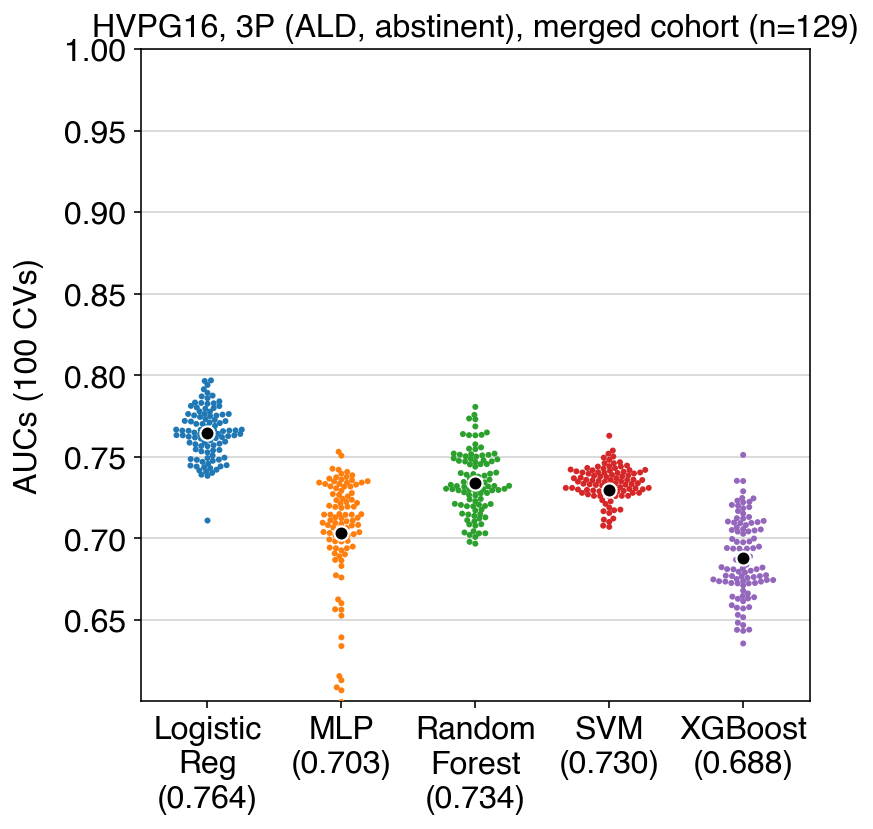

In [9]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P (ALD, abstinent)"

_ = HVPG16_functions.test_models_variables(abstinents, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=16, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3P - drinking

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 78 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.639611,0.011385,0.640625,0.011385
1,MLP,0.580036,0.015667,0.603175,0.015667
2,Random Forest,0.665335,0.010943,0.666667,0.010943
3,SVM,0.520131,0.015626,0.555556,0.015626
4,XGBoost,0.632365,0.010893,0.634921,0.010893


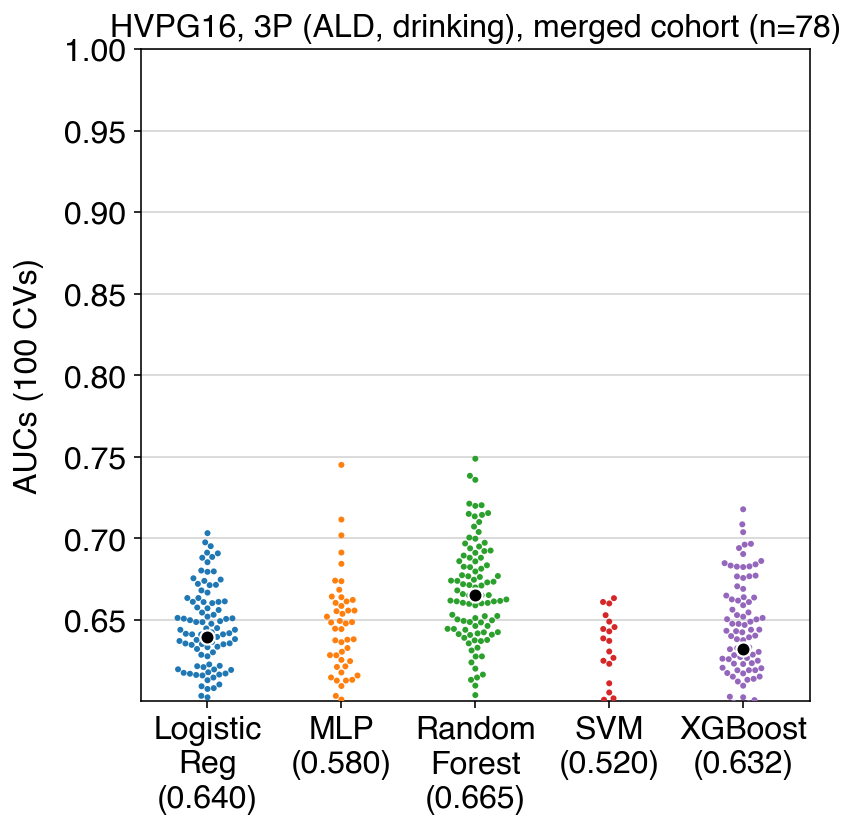

In [10]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P (ALD, drinking)"

_ = HVPG16_functions.test_models_variables(drinking, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=16, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### VIRAL patients only: suppresed/cured vs viremic

In [11]:
VIRAL = data[data.Etiology == "2"].copy().reset_index(drop=True)

suppressed = VIRAL.query("Disease_activity == 0")
viremic = VIRAL.query("Disease_activity == 1")

In [12]:
VIRAL.Disease_activity.value_counts()

1.0    291
0.0    117
Name: Disease_activity, dtype: int64

#### 3P - suppressed

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 117 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.756055,0.009718,0.759259,0.009718
1,MLP,0.748527,0.009530,0.754902,0.009530
2,Random Forest,0.772210,0.009676,0.785675,0.009676
3,SVM,0.629089,0.021470,0.722222,0.021470
4,XGBoost,0.774536,0.010826,0.788889,0.010826


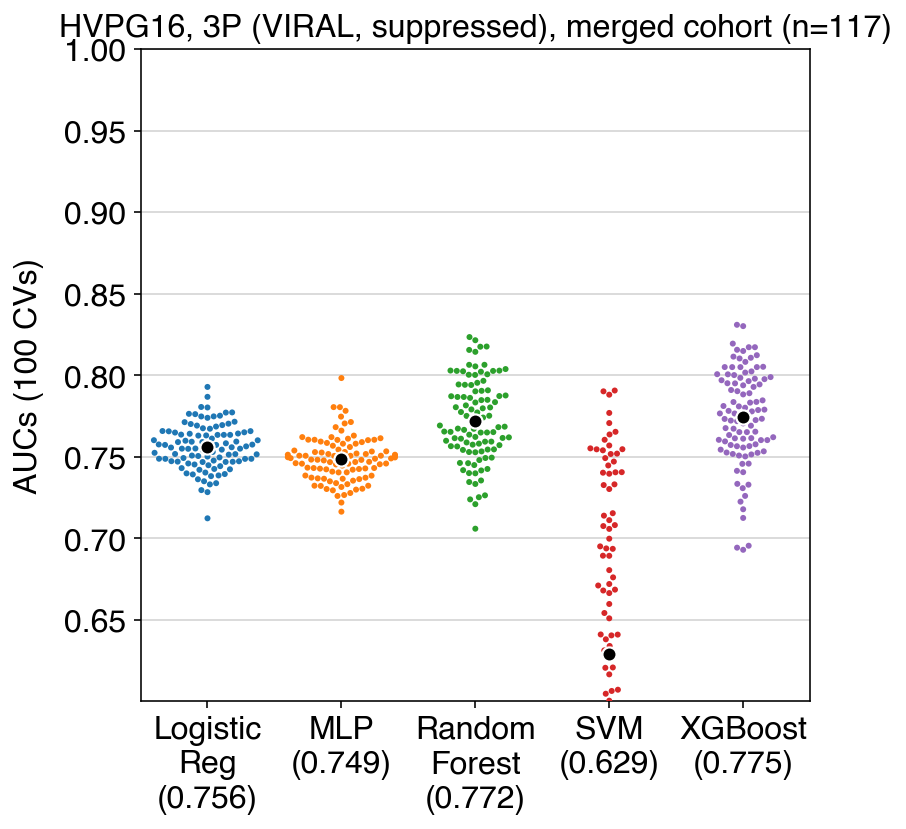

In [13]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P (VIRAL, suppressed)"

_ = HVPG16_functions.test_models_variables(suppressed, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=16, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3P - viremic

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 290 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.690593,0.005783,0.692105,0.005783
1,MLP,0.671929,0.006704,0.678250,0.006704
2,Random Forest,0.654952,0.005704,0.656475,0.005704
3,SVM,0.563023,0.011726,0.608752,0.011726
4,XGBoost,0.637252,0.006081,0.642159,0.006081


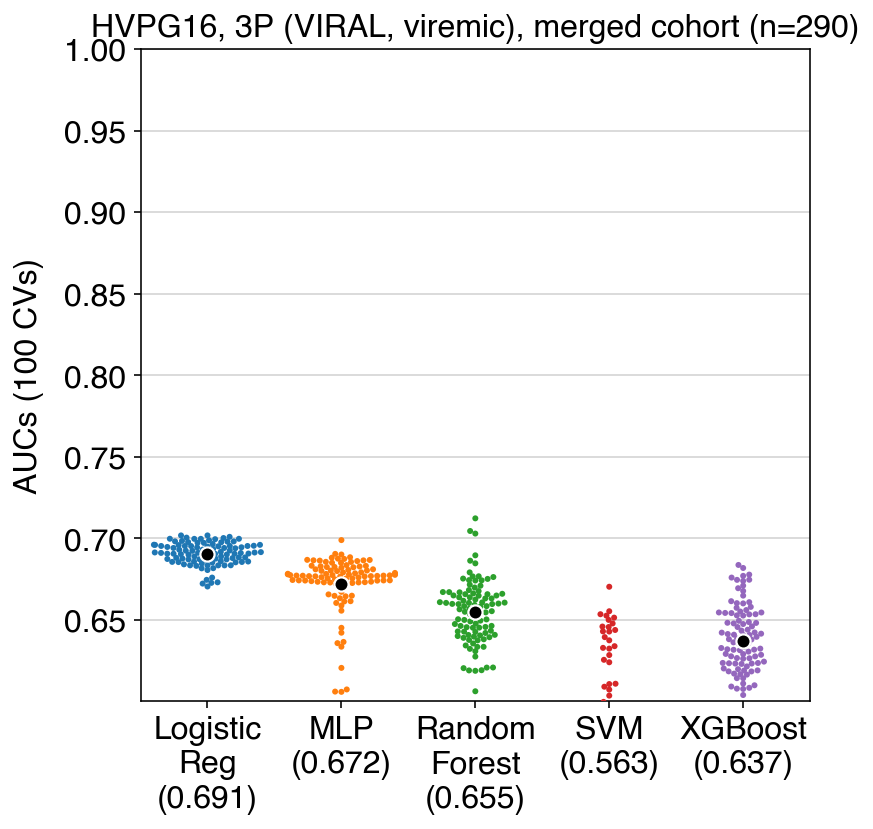

In [14]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P (VIRAL, viremic)"

_ = HVPG16_functions.test_models_variables(viremic, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=16, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### CHOL: try 3P model only on OR without cholestatic patients

In [34]:
etio2 = data["Etiology"].astype("U")

data_chol = data[etio2.str.contains("5")].copy().reset_index(drop=True)
data_nochol = data[~(etio2.str.contains("5"))].copy().reset_index(drop=True)

#### 3P - without CHOL

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 1141 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.740703,0.002607,0.741673,0.002607
1,MLP,0.727648,0.002824,0.728120,0.002824
2,Random Forest,0.708629,0.002523,0.709494,0.002523
3,SVM,0.695189,0.003164,0.693697,0.003164
4,XGBoost,0.697370,0.002606,0.697094,0.002606


/Users/jreinis/miniconda3/envs/test/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


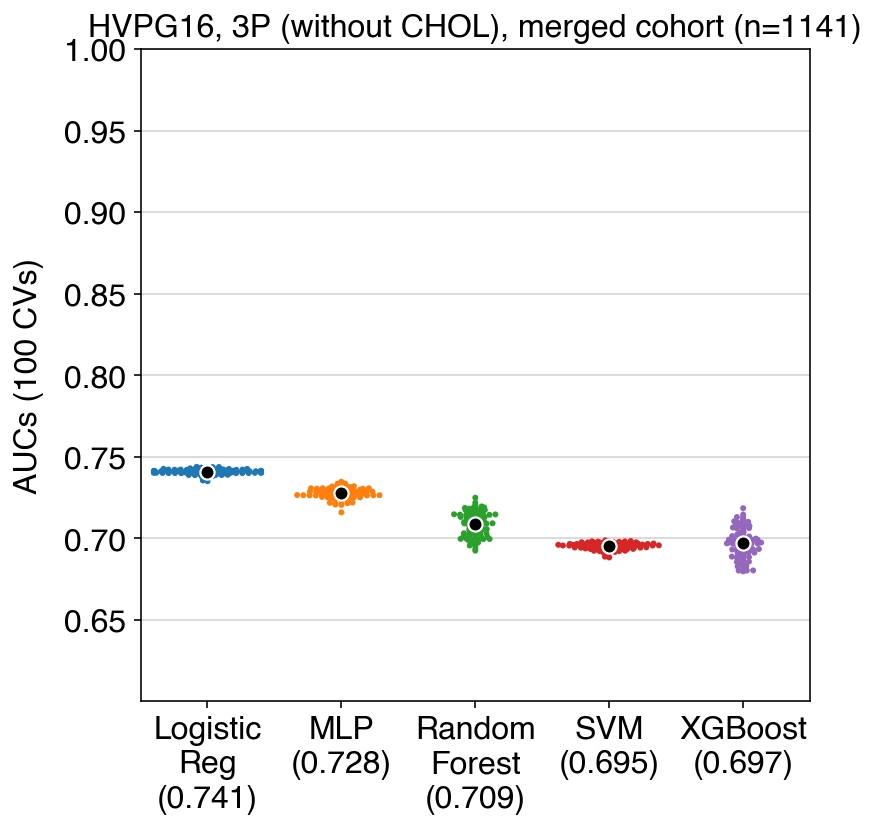

In [35]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P (without CHOL)"

_ = HVPG16_functions.test_models_variables(data_nochol, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=16, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3P - CHOL only

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), merged cohort(s), 63 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.680405,0.012508,0.690476,0.012508
1,MLP,0.694462,0.013409,0.714286,0.013409
2,Random Forest,0.661358,0.012412,0.675000,0.012412
3,SVM,0.609936,0.022225,0.685714,0.022225
4,XGBoost,0.682370,0.012203,0.685714,0.012203


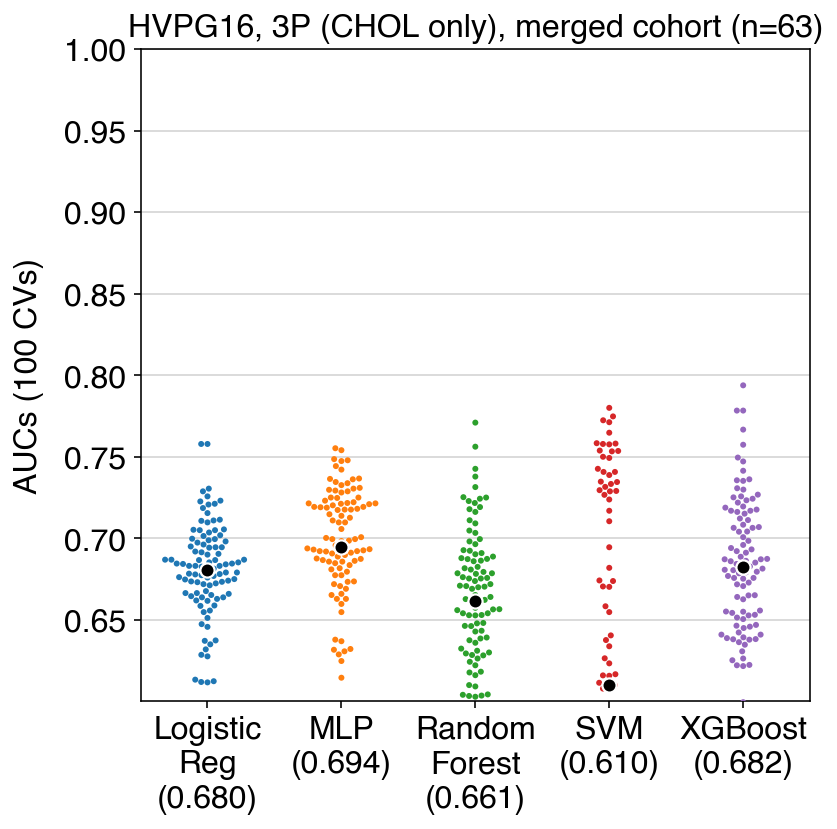

In [36]:
cohort, variables, title = "merged", ["PLT", "BILI", "INR"], "3P (CHOL only)"

_ = HVPG16_functions.test_models_variables(data_chol, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=16, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### Vienna Cohort Only, HVPG16

#### 5-parameter

In [37]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "aPTT", "CHE", "GGT"], "5P"

HVPG threshold 16 mmHg, 5 variables (PLT, BILI, aPTT, CHE, GGT), VIENNA cohort(s), 162 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.886726,0.004601,0.888889,0.004601
1,MLP,0.789591,0.007893,0.803424,0.007893
2,Random Forest,0.865021,0.005181,0.870130,0.005181
3,SVM,0.773999,0.006481,0.779221,0.006481
4,XGBoost,0.848370,0.005733,0.852994,0.005733


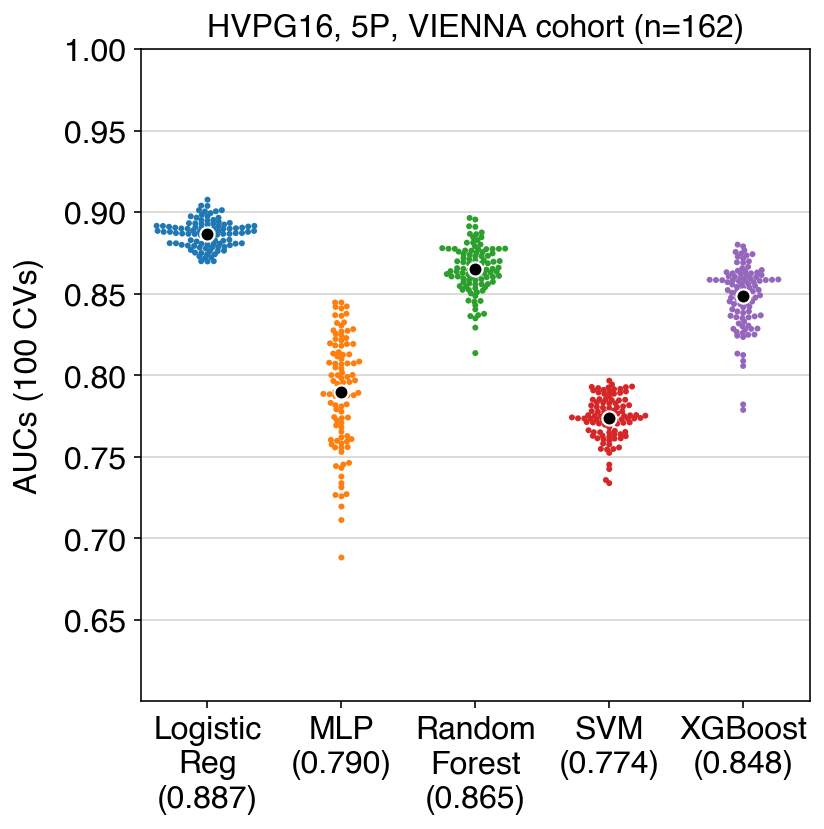

In [38]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 5-parameter including liver stiffness

In [39]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "aPTT", "CHE", "GGT", "LSM"], "5P + LSM"

HVPG threshold 16 mmHg, 6 variables (PLT, BILI, aPTT, CHE, GGT, LSM), VIENNA cohort(s), 151 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.909406,0.004477,0.914438,0.004477
1,MLP,0.808934,0.008805,0.825000,0.008805
2,Random Forest,0.886703,0.004931,0.890909,0.004931
3,SVM,0.822921,0.006544,0.825000,0.006544
4,XGBoost,0.858734,0.005368,0.860000,0.005368


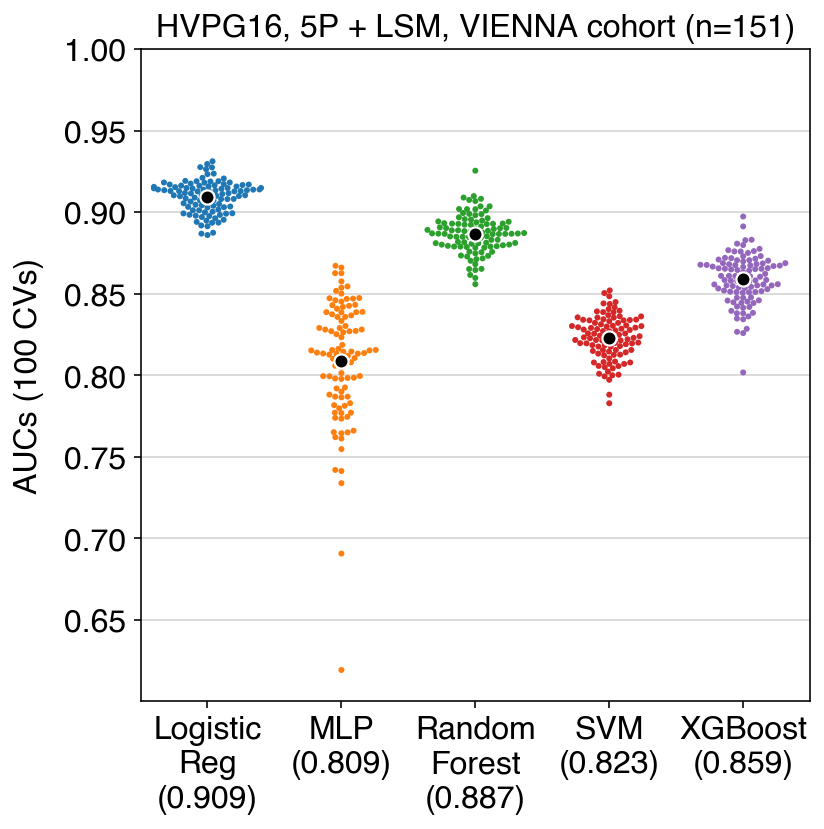

In [40]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter

In [41]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "INR"], "3P"

HVPG threshold 16 mmHg, 3 variables (PLT, BILI, INR), VIENNA cohort(s), 162 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.812801,0.006049,0.818182,0.006049
1,MLP,0.791897,0.006822,0.797570,0.006822
2,Random Forest,0.757304,0.006133,0.754772,0.006133
3,SVM,0.778940,0.006574,0.783550,0.006574
4,XGBoost,0.739233,0.006795,0.739874,0.006795


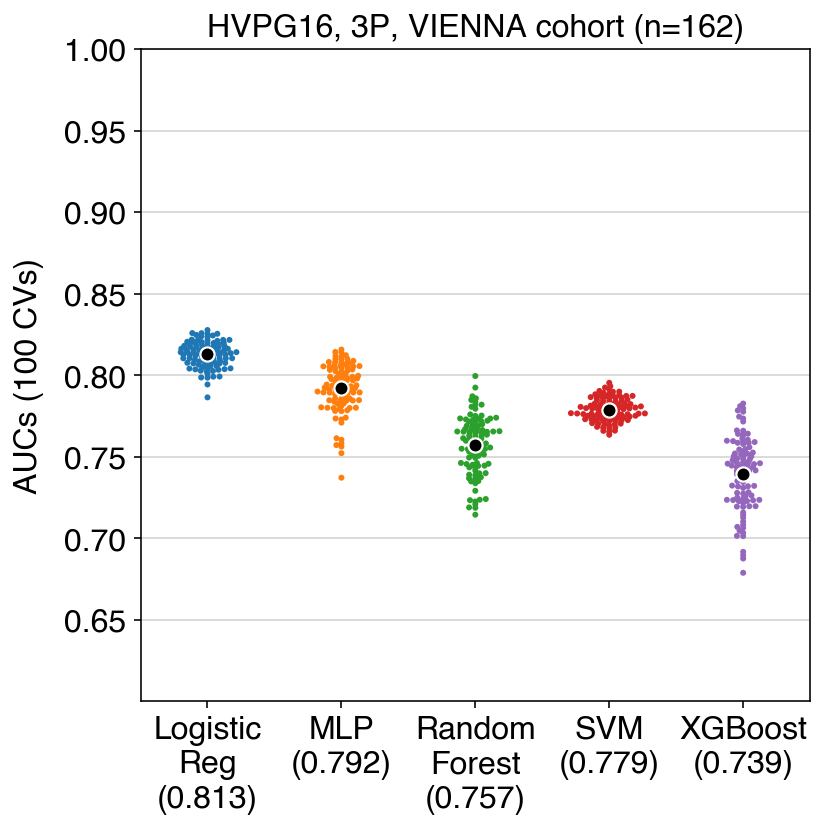

In [42]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter including liver stiffness

In [43]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "INR", "LSM"], "3P + LSM"

HVPG threshold 16 mmHg, 4 variables (PLT, BILI, INR, LSM), VIENNA cohort(s), 151 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.875722,0.005500,0.881818,0.005500
1,MLP,0.852538,0.006455,0.860000,0.006455
2,Random Forest,0.825479,0.005990,0.832159,0.005990
3,SVM,0.866019,0.005732,0.873864,0.005732
4,XGBoost,0.807475,0.006586,0.811699,0.006586


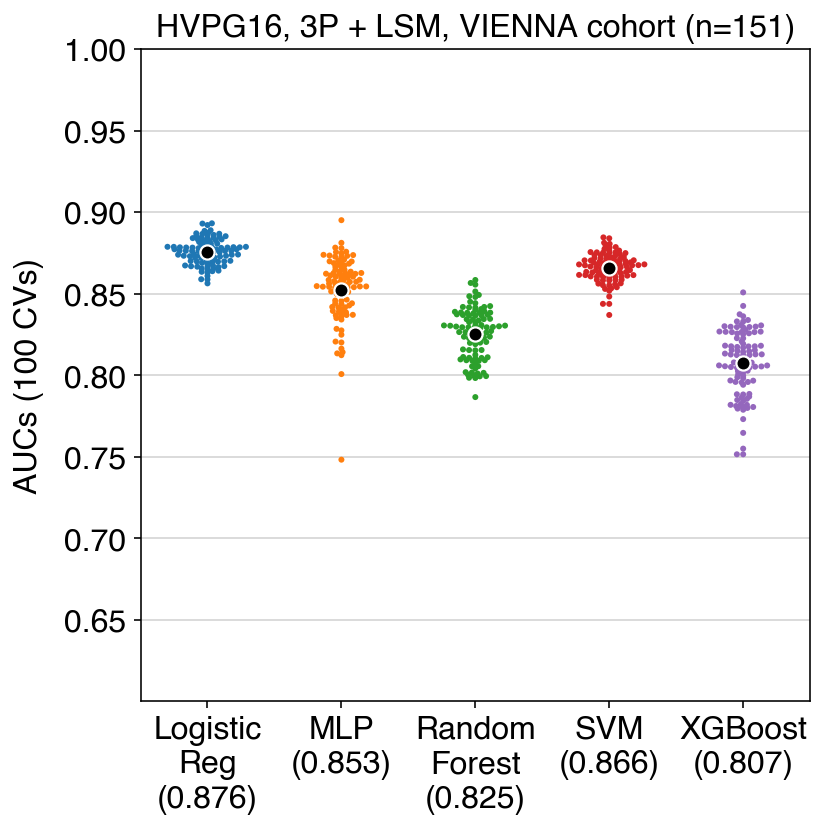

In [44]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

### Vienna Cohort Only, HVPG10

#### 5-parameter

In [6]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "aPTT", "CHE", "GGT"], "5P"

HVPG threshold 10 mmHg, 5 variables (PLT, BILI, aPTT, CHE, GGT), VIENNA cohort(s), 162 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.812890,0.006674,0.818182,0.006674
1,MLP,0.725164,0.008930,0.735537,0.008930
2,Random Forest,0.761575,0.007432,0.765496,0.007432
3,SVM,0.773738,0.007549,0.778247,0.007549
4,XGBoost,0.715771,0.007712,0.719008,0.007712


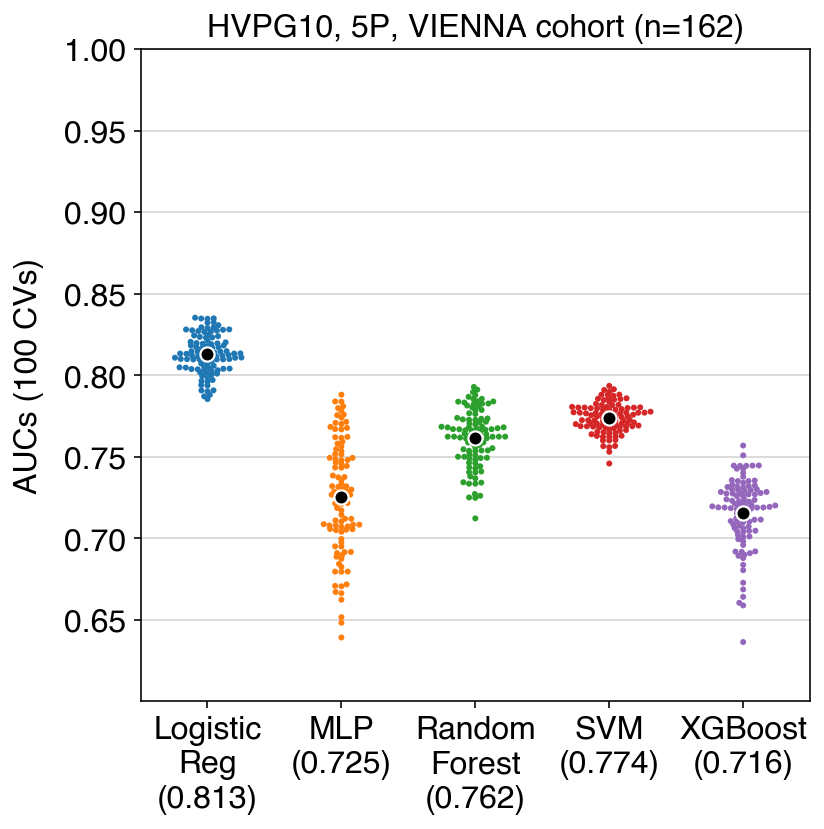

In [7]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=10, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 5-parameter including liver stiffness

In [8]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "aPTT", "CHE", "GGT", "LSM"], "5P + LSM"

HVPG threshold 10 mmHg, 6 variables (PLT, BILI, aPTT, CHE, GGT, LSM), VIENNA cohort(s), 151 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.851027,0.005453,0.855000,0.005453
1,MLP,0.784395,0.008531,0.795000,0.008531
2,Random Forest,0.841988,0.005590,0.847500,0.005590
3,SVM,0.807791,0.007128,0.815000,0.007128
4,XGBoost,0.831754,0.005791,0.839048,0.005791


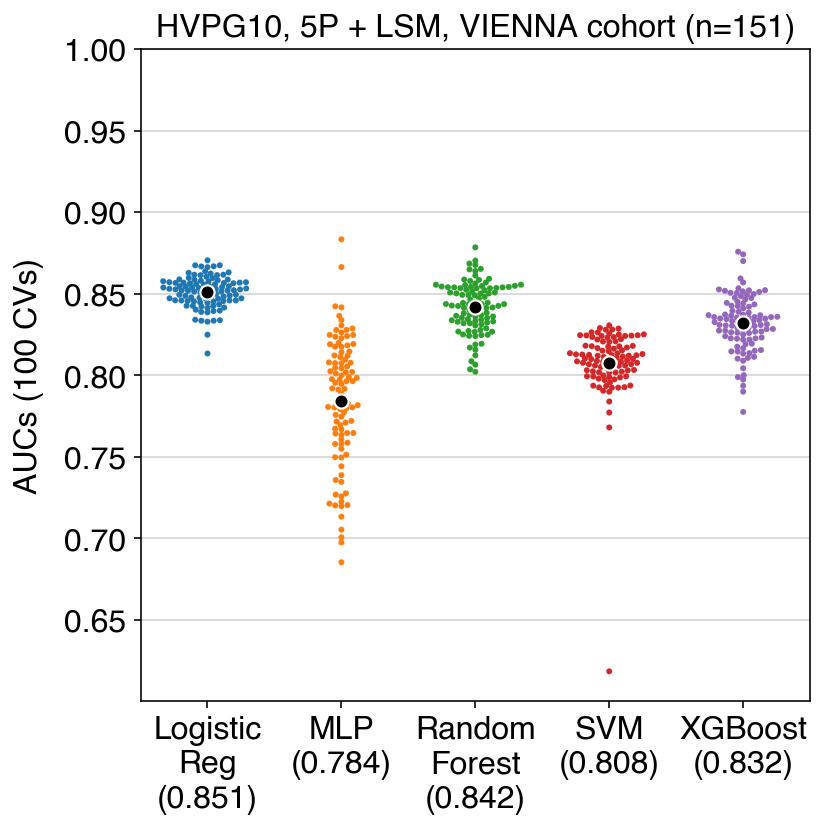

In [9]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=10, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter

In [10]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "INR"], "3P"

HVPG threshold 10 mmHg, 3 variables (PLT, BILI, INR), VIENNA cohort(s), 162 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.783990,0.006670,0.785124,0.006670
1,MLP,0.511302,0.023642,0.534199,0.023642
2,Random Forest,0.716017,0.006905,0.715909,0.006905
3,SVM,0.729009,0.008727,0.731602,0.008727
4,XGBoost,0.661700,0.007436,0.662338,0.007436


/Users/jreinis/miniconda3/envs/test/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


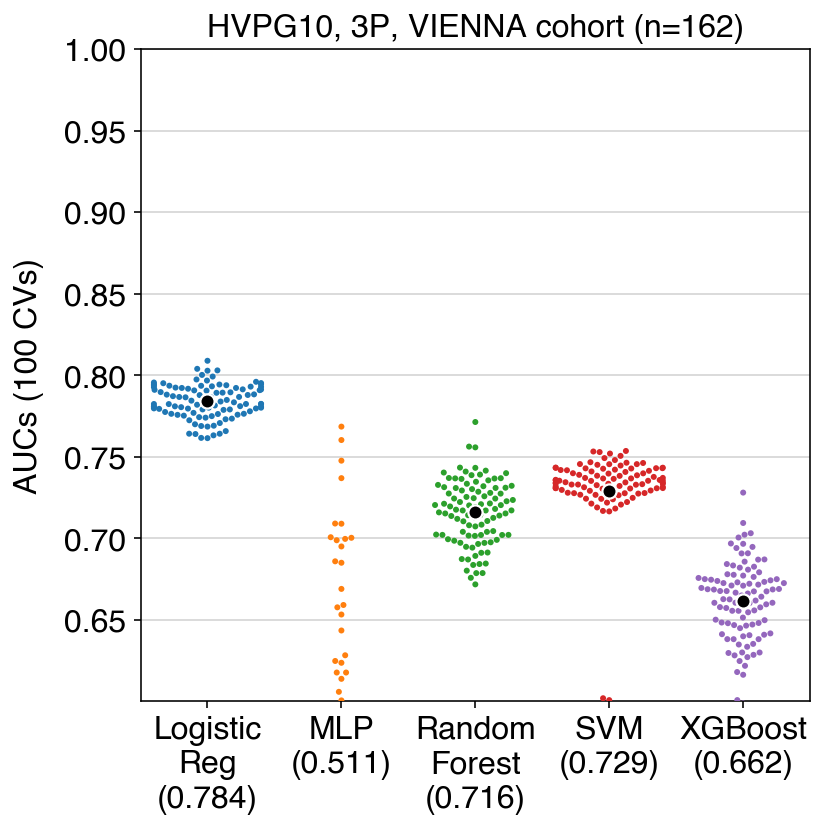

In [11]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=10, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)

#### 3-parameter including liver stiffness

In [12]:
cohort, variables, title = "VIENNA", ["PLT", "BILI", "INR", "LSM"], "3P + LSM"

HVPG threshold 10 mmHg, 4 variables (PLT, BILI, INR, LSM), VIENNA cohort(s), 151 patients (no balancing), 100 cross-validation(s)

Logistic Reg             ****************************************************************************************************
MLP                      ****************************************************************************************************
Random Forest            ****************************************************************************************************
SVM                      ****************************************************************************************************
XGBoost                  ****************************************************************************************************



,model,mean_AUC,mean_AUC_95_CI_range,median_AUC,median_AUC_95_CI_range
0,Logistic Reg,0.834542,0.005863,0.840000,0.005863
1,MLP,0.777360,0.012762,0.814643,0.012762
2,Random Forest,0.793670,0.006212,0.795000,0.006212
3,SVM,0.806152,0.006276,0.810000,0.006276
4,XGBoost,0.787149,0.006330,0.790000,0.006330


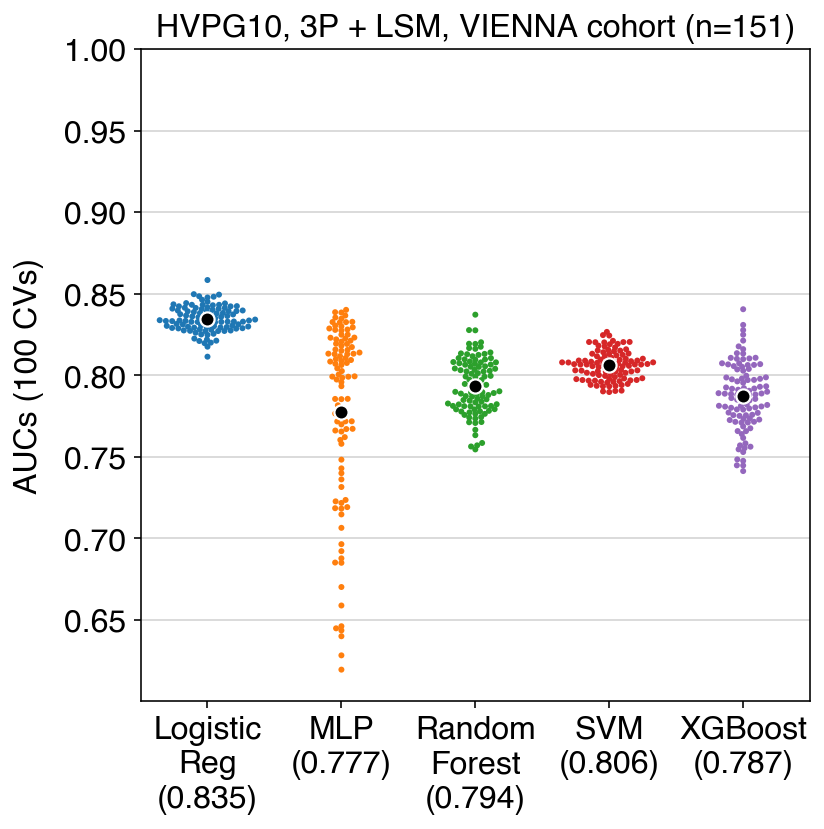

In [13]:
_ = HVPG16_functions.test_models_variables(data, models, names, variables, n_cv=n_cv, cohort=cohort, HVPG_threshold=10, analyze=True,
                                                   save_folder_plots=output_plots_path, save_folder_AUCs=output_AUCs_path, title=title)